In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Runge-Kutta implementaion 

def rk4_step(y0, x0, f, h):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
        Output:
            yp1 - numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0)
    k2 = h * f(y0 + k1/2., x0 + h/2.)
    k3 = h * f(y0 + k2/2., x0 + h/2.)
    k4 = h * f(y0 + k3, x0 + h)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n):
    ''' Simple implementation of RK4
        Inputs:
            y_0    - numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            n      - number of steps
        Output:
            yn - numpy array with the results of the integration for every time step (includes y0)
            xn - numpy array with the time step value (includes start x0)
    '''
    yn = np.zeros((n+1, y0.shape[0]))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h)
        
    return(yn, xn)


In [4]:
# Test RK4 routine with simple differential equation (exponentatial decay)
r=1
def f_simple(x,t):
    return -x

Text(0.5, 1.0, 'Step size h=0.1')

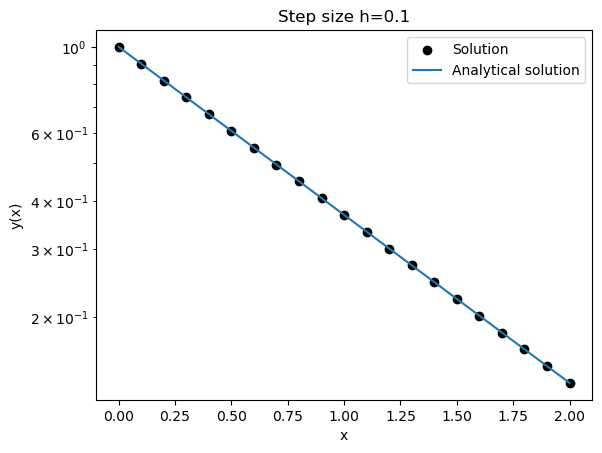

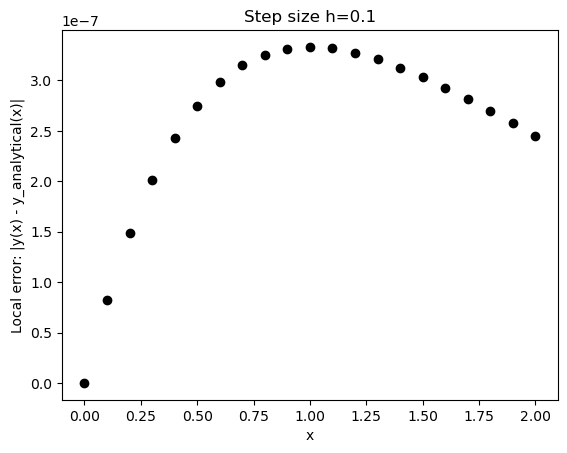

In [5]:
# initial conditions
x_0 = 0 
y_0 = np.array([1])

# solution
h = 0.1
y, x = rk4(y_0, x_0, f_simple, h, 20)

plt.scatter(x,y, color = 'black', label='Solution')
plt.plot(x, np.exp(-x), label = 'Analytical solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(f'Step size h={h}')
plt.yscale('log')
plt.legend()

# test accuracy by comparing with analytical solution which is exp(-x)
err = np.abs(y.T[0] - np.exp(-x))  # I have to transpose and selet first entry from array due to the shape of y (set like this for the next exercise)
plt.figure()
plt.scatter(x, err, color='black')
plt.xlabel('x')
plt.ylabel('Local error: |y(x) - y_analytical(x)|')
plt.title(f'Step size h={h}')

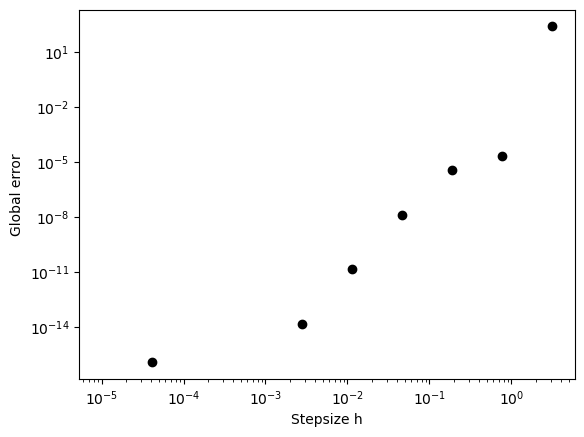

In [6]:
# vary the stepsize over various orders of magnitude 

stepsize = np.logspace(-5,0.5,10, base = 10)  

for h in stepsize:
    y, x = rk4(y_0, x_0, f_simple, h, 10)
    err = y.T[0] - np.exp(-x)
    plt.scatter(h, err[-1], color = 'black')  #plot stepsize and the global error (erorr of last iteration point)
plt.xlabel('Stepsize h')
plt.ylabel('Global error')
plt.xscale('log')
plt.yscale('log') 
#plt.xlim(1e-4, 1.2e2) 


In [7]:
# EXERCISE 2.a.

# 3-body problem 

m1 = 1
m2 = 1
m3 = 1
G = 1


# initial conditions
x_0 = 0 
y_0 = np.array([-0.97000436,0.24308753,-0.46620368,-0.43236573,0.97000436,-0.24308753,-0.46620368,-0.43236573,0,0,0.93240737,0.86473146]) #vector contains initial coordinates and velocities of the 3 bodies

# stepsize

h = 0.005


def norm_21(y):                                       #distance between body 1 and body 2
    return np.sqrt((y[4]-y[0])**2+(y[5]-y[1])**2)

def norm_31(y):                                       #distance between body 1 and body 3
    return np.sqrt((y[8]-y[0])**2+(y[9]-y[1])**2)

def norm_32(y):                                       #distance between body 2 and body 3
    return np.sqrt((y[8]-y[4])**2+(y[9]-y[5])**2) 


#function containing the derivatives of the vector y; derivative of position is the velocity and derivative of velocity is acceleration
def f(y,x):                  
     return np.array([y[2],                                                                 #v_x of body 1
                     y[3],                                                                  #v_y of body 1
                     -G*m2*(y[0]-y[4])/(norm_21(y)**3) - G*m3*(y[0]-y[8])/(norm_31(y)**3),  #a_x of body 1
                     -G*m2*(y[1]-y[5])/(norm_21(y)**3) - G*m3*(y[1]-y[9])/(norm_31(y)**3),  #a_y of body 1
                     y[6],                                                                  #v_x of body 2
                     y[7],                                                                  #v_y of body 2
                     -G*m1*(y[4]-y[0])/(norm_21(y)**3) - G*m3*(y[4]-y[8])/(norm_32(y)**3),  #a_x of body 2
                     -G*m1*(y[5]-y[1])/(norm_21(y)**3) - G*m3*(y[5]-y[9])/(norm_32(y)**3),  #a_y of body 2
                     y[10],                                                                 #v_x of body 3   
                     y[11],                                                                 #v_y of body 3
                     -G*m1*(y[8]-y[0])/(norm_31(y)**3) - G*m2*(y[8]-y[4])/(norm_32(y)**3),  #a_x of body 3
                     -G*m1*(y[9]-y[1])/(norm_31(y)**3) - G*m2*(y[9]-y[5])/(norm_32(y)**3)]) #a_x of body 3



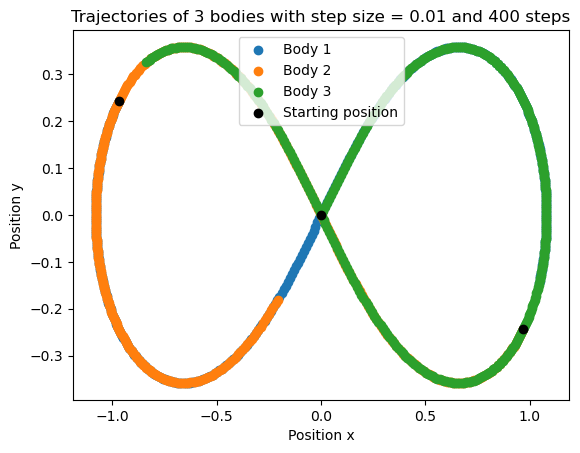

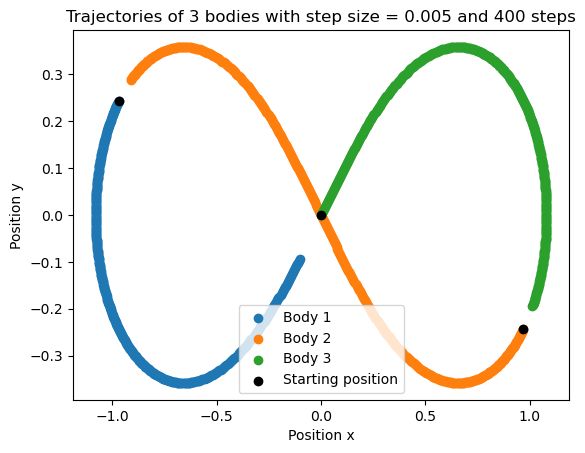

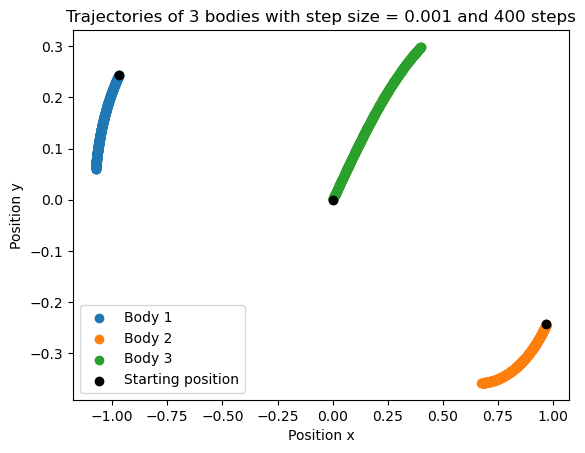

In [187]:
# plot solution for different step sizes 

for h in [0.01, 0.005, 0.001]:
        y,x = rk4(y_0,x_0,f,h,400)    

        fig= plt.figure()

        # plot positions
        plt.scatter(y[:,0],y[:,1],label = 'Body 1')
        plt.scatter(y[:,4],y[:,5],label = 'Body 2')
        plt.scatter(y[:,8],y[:,9],label = 'Body 3')

        plt.scatter(y_0[0],y_0[1],label = 'Starting position', color='black')
        plt.scatter(y_0[4],y_0[5], color='black')
        plt.scatter(y_0[8],y_0[9],color='black')
        plt.xlabel('Position x')
        plt.ylabel('Position y')
        plt.title(f'Trajectories of 3 bodies with step size = {h} and 400 steps')
        plt.legend()

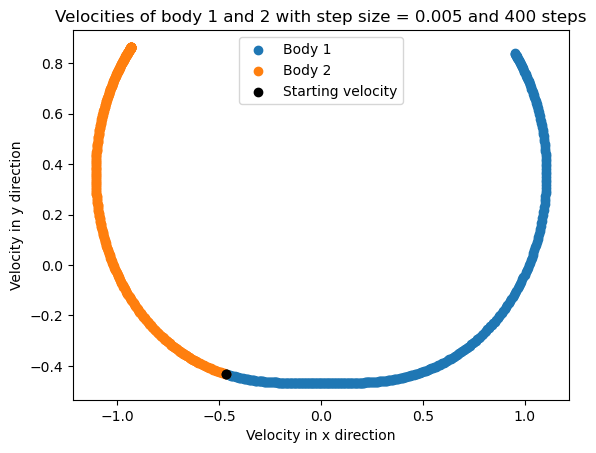

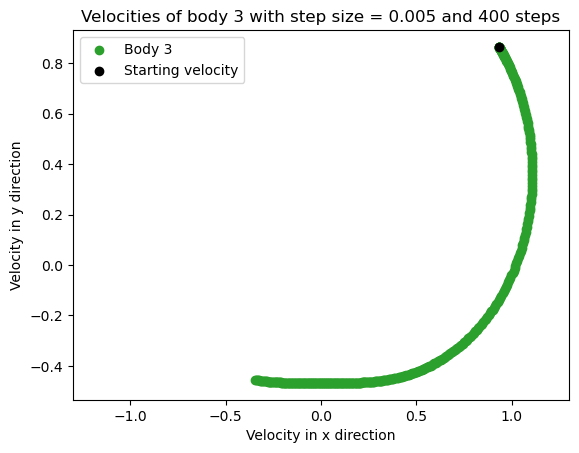

In [186]:
h = 0.005
y,x = rk4(y_0,x_0,f,h,400)    

fig= plt.figure()



# plot velocities 

# body 1 and 2
plt.scatter(y[:,2],y[:,3],label = "Body 1")
plt.scatter(y[:,6],y[:,7],label = "Body 2")
plt.scatter(y_0[2],y_0[3],label = 'Starting velocity', color='black')
plt.scatter(y_0[6],y_0[7], color='black')
plt.xlabel('Velocity in x direction')
plt.ylabel('Velocity in y direction')
plt.title(f'Velocities of body 1 and 2 with step size = {h} and 400 steps')
plt.legend()


# body 3 (plot separately for better visualisation)
plt.figure()

plt.scatter(y[:,10],y[:,11],label = "Body 3", color='C2')
plt.scatter(y_0[10],y_0[11],color='black', label = 'Starting velocity')
plt.xlim(-1.3, 1.3)
plt.xlabel('Velocity in x direction')
plt.ylabel('Velocity in y direction')
plt.title(f'Velocities of body 3 with step size = {h} and 400 steps')
plt.legend()

(-20.0, 20.0)

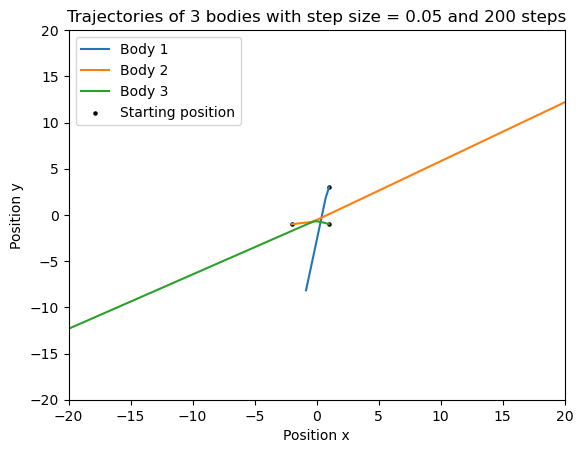

In [8]:
# EXERCISE 2.b.

m1 = 3
m2 = 4
m3 = 5
G = 1

x_1 = np.array([3,4]) #coordinates of body 1
x_2= np.array([0,0])  #coordinates of body 2
x_3 = np.array([3,0]) #coordinates of body 3
CM = 1/(m1 + m2 + m3)*(m1*x_1 + m2*x_2 + m3*x_3) #coordinates of center of mass, place origin at this point 

x_1cm  = x_1 - CM     #coordinates of body 1 in center of mass system 
x_2cm  = x_2 - CM     #coordinates of body 2 in center of mass system 
x_3cm  = x_3 - CM    #coordinates of body 3 in center of mass system


x_0 = 0 #initial time
y_0 = np.array([x_1cm[0],x_1cm[1],0,0,x_2cm[0],x_2cm[1],0,0,x_3cm[0],x_3cm[1],0,0]) #initial position wrt to center of mass and velocities of the bodies


h = 0.05
n = 200

y,x = rk4(y_0,x_0,f,h,n)    

fig= plt.figure()

# plot positions
plt.plot(y[:,0],y[:,1],label = 'Body 1')
plt.plot(y[:,4],y[:,5],label = 'Body 2')
plt.plot(y[:,8],y[:,9],label = 'Body 3')
plt.scatter(y_0[0],y_0[1],label = 'Starting position', color='black', s =5)
plt.scatter(y_0[4],y_0[5], color='black', s=5)
plt.scatter(y_0[8],y_0[9],color='black', s=5)
plt.xlabel('Position x')
plt.ylabel('Position y')
plt.title(f'Trajectories of 3 bodies with step size = {h} and {n} steps')
plt.legend()

plt.xlim(-20,20)
plt.ylim(-20,20)

In [16]:
#choose different timesteps

stepsize = np.array([0.1,0.01,0.001,0.0001, 0.00005]) 

t = 11 # integration interval

#loop for computing minimal separation

for h in stepsize: 

    n = int(t/h) # adjust number of steps according to step size 
    
    y, x = rk4(y_0,x_0,f,h,n) 
    
    # arrays containing distance in first argument and time in the second one so I can later access the time at minimum separation
    distance_12 = np.zeros((n+1,2)) 
    distance_13 = np.zeros((n+1,2))
    distance_23 = np.zeros((n+1,2))

    for i in range(n+1):                       # calculate mutual distances and write distance and time to arrays
        distance_12[i][0] = norm_21(y[i,:])
        distance_12[i][1] = x[i]

        distance_13[i][0] = norm_31(y[i,:])
        distance_13[i][1] = x[i]

        distance_23[i][0] = norm_32(y[i,:])
        distance_23[i][1] = x[i]

    #finding times of smallest distance
    #select only first column of array (distances)
    a = distance_12[:,0]  
    b = distance_13[:,0]
    c = distance_23[:,0]
    
    #arrays to save the smallest distance and time 
    mina = np.zeros((5,2))
    minb = np.zeros((5,2))
    minc = np.zeros((5,2))

    #check for local minima and save distance and time to mina/b/c
    j = 0
    for i in range(1,len(a)-1):
        if a[i]<a[i-1] and a[i]<a[i+1]:
            mina[j,0] = a[i]
            mina[j,1] = distance_12[i,1]
            j += 1

    j = 0
    for i in range(1,len(b)-1):
        if (b[i]<b[i-1] and b[i]<b[i+1]):
            minb[j,0] = b[i]
            minb[j,1] = distance_13[i,1]
            j += 1

    j = 0
    for i in range(1,len(c)-1):
        if (c[i]<c[i-1] and c[i]<c[i+1]):
            minc[j,0] = c[i]
            minc[j,1] = distance_23[i,1]
            j += 1        

    #put all times of minimum distance in vector times and sort them by distance in order to take only the 5 closests encounters 
    merged = np.concatenate((mina,minb,minc))
    merged_sorted = merged[merged[:,0].argsort()] 

    # create file with all minimal distances 
    with open(f'Alltimes{h}.txt', 'w', newline='') as file:
        for number in merged_sorted[:,1]:
            file.write(f'{number}\n')

  
    times = merged_sorted[:,1][merged_sorted[:,1] != 0][:5] #take only the first 5 times and get rid of the 0s 
    times_sorted = np.sort(times)                           #sort the times

    #create file with the time of the 5 closest encounters 
    file = open   
    with open (f'Times{h}', 'w') as file:
        for number in times_sorted[:5]:
            file.write(f'{number}\n') 
   
    print('Times of smallest distance :',*times_sorted[:5])
     

Times of smallest distance : 1.8000000000000005 1.9000000000000006 2.1000000000000005 2.1000000000000005 2.400000000000001


Times of smallest distance : 1.8500000000000014 1.8800000000000014 2.6999999999999864 3.099999999999978
Times of smallest distance : 1.8789999999999039 1.885999999999903 1.8889999999999028 1.9019999999999013 1.9639999999998945
Times of smallest distance : 1.8792999999998095 3.019100000001947 3.7401000000034683 6.467599999998265 8.641799999993198
Times of smallest distance : 1.8793500000017538 3.7984499999978167 6.88229999999063 8.755449999986265 9.956599999983466


/usr/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


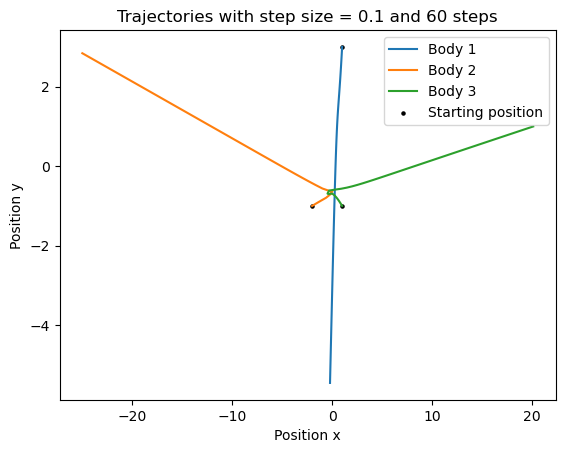

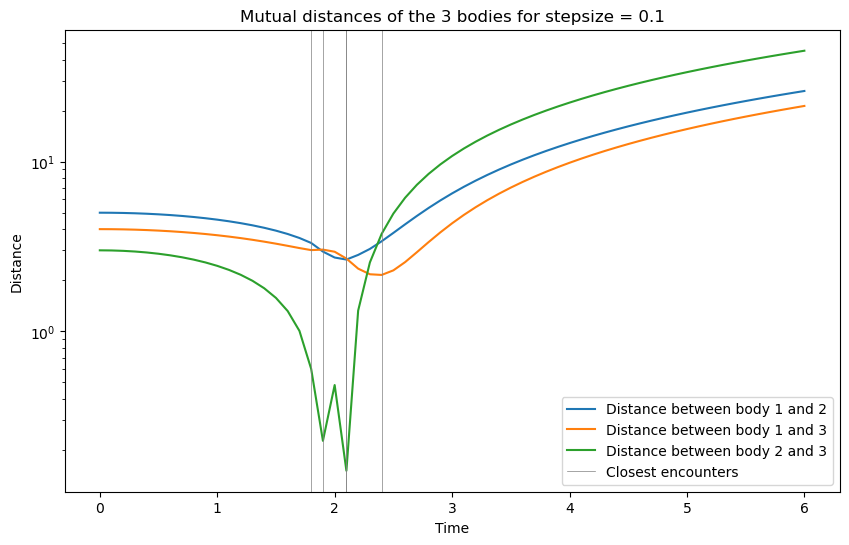

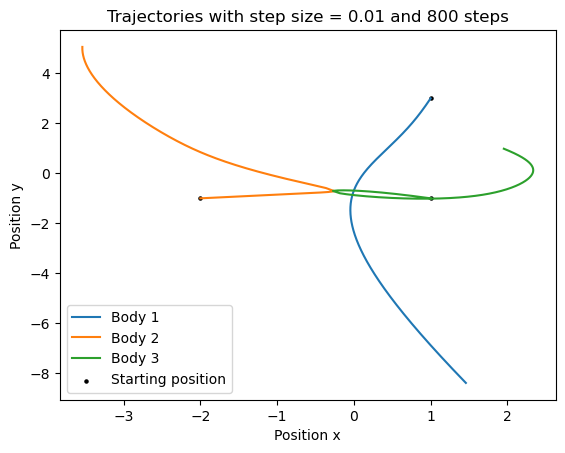

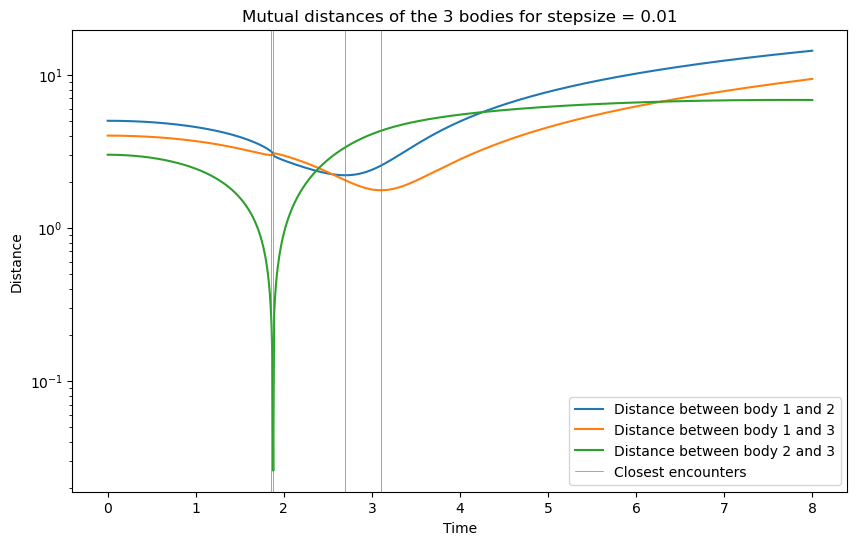

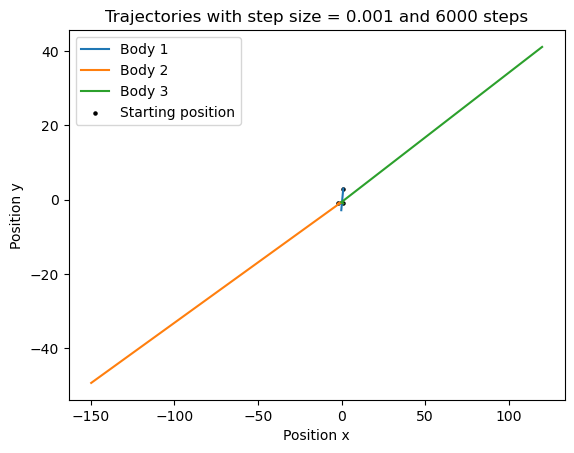

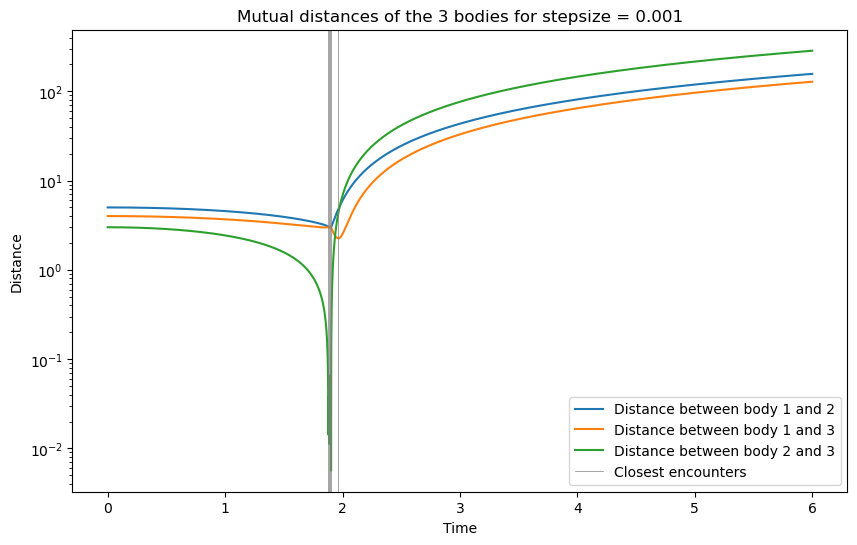

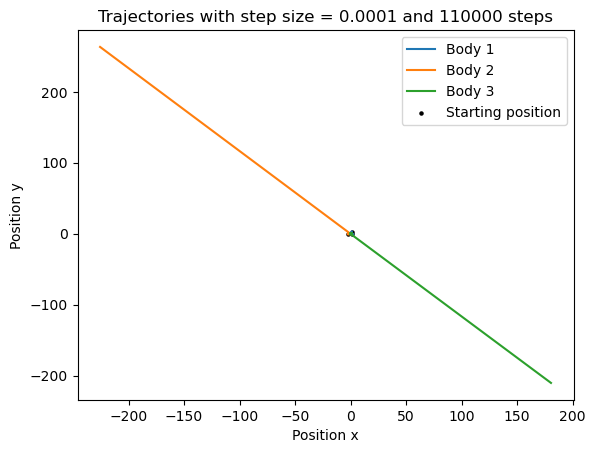

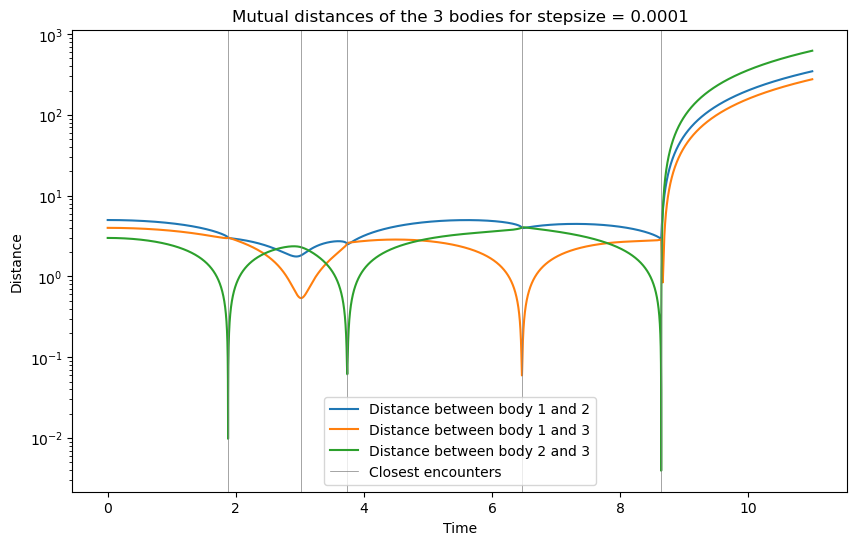

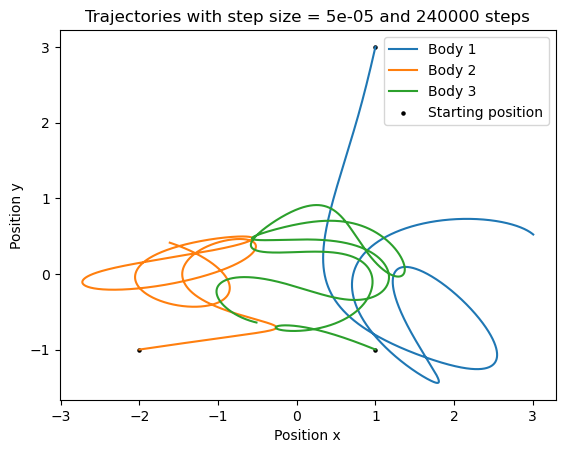

/usr/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


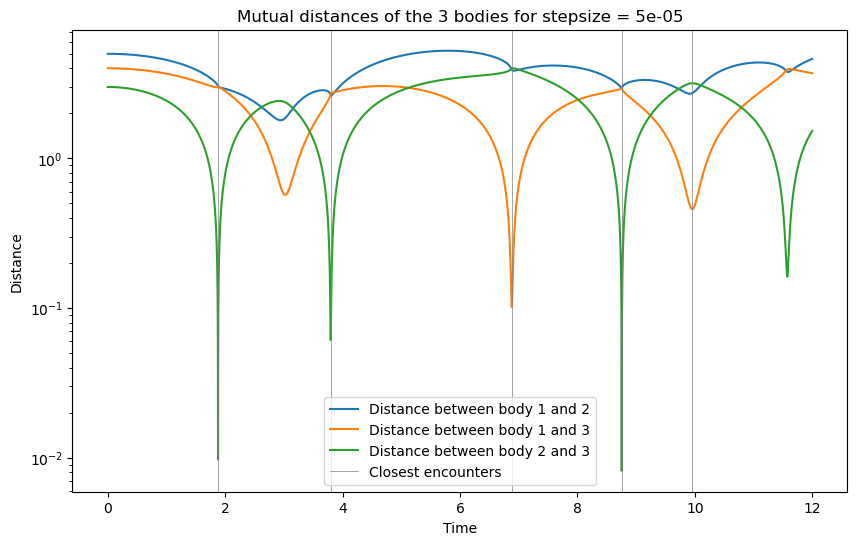

In [10]:

stepsize = np.array([0.1,0.01,0.001,0.0001, 0.00005]) #different timesteps

t = [6, 8, 6, 11, 12] # integration interval for the diferent runs

#loop for the plotting

for i, h in enumerate(stepsize): 

    n = int(t[i]/h) # adjust number of steps according to step size 
    
    y,x = rk4(y_0,x_0,f,h,n)    

    #(i) Plot trajectory of the 3 bodies
    plt.figure()

    # plot positions
    plt.plot(y[:,0],y[:,1],label = 'Body 1')
    plt.plot(y[:,4],y[:,5],label = 'Body 2')
    plt.plot(y[:,8],y[:,9],label = 'Body 3')
    plt.scatter(y_0[0],y_0[1],label = 'Starting position', color='black', s =5)
    plt.scatter(y_0[4],y_0[5], color='black', s=5)
    plt.scatter(y_0[8],y_0[9],color='black', s=5)
    plt.xlabel('Position x')
    plt.ylabel('Position y')
    plt.title(f'Trajectories with step size = {h} and {n} steps')
    plt.legend()
    
    #(ii) Plot mutual distances

    # arrays containing distance in first argument and time in the second one so we can access the time at minimum separation
    distance_12 = np.zeros((n+1,2)) 
    distance_13 = np.zeros((n+1,2))
    distance_23 = np.zeros((n+1,2))
    
    for i in range(n+1):                       # calculate mutual distances and write distance and time to arrays
        distance_12[i][0] = norm_21(y[i,:])
        distance_12[i][1] = x[i]

        distance_13[i][0] = norm_31(y[i,:])
        distance_13[i][1] = x[i]

        distance_23[i][0] = norm_32(y[i,:])
        distance_23[i][1] = x[i]

    # Plot distances vs time
    
    plt.figure(figsize=(10, 6))

    plt.plot(distance_12[:,1],distance_12[:,0],label = 'Distance between body 1 and 2')
    plt.plot(distance_13[:,1],distance_13[:,0],label = 'Distance between body 1 and 3')
    plt.plot(distance_23[:,1],distance_23[:,0],label = 'Distance between body 2 and 3')

    #overplot times of first 5 encounters; read values from files

    encounter_times = np.loadtxt(f'Times{h}', unpack = True)
    for i,line in enumerate(encounter_times):
        plt.axvline(line, color = 'grey', linewidth = 0.5, label = 'Closest encounters' if i == 0 else '')


    plt.xlabel('Time')
    plt.ylabel('Distance')
    plt.title(f'Mutual distances of the 3 bodies for stepsize = {h}')
    plt.yscale('log')
    plt.legend()